# Homework 9

# Problem 7 - Regularized Linear Regression

## 7.1 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.style as style
style.use('bmh')

## 7.2 Examine data

   digit  intensity  symmetry
0    6.0   0.341092 -4.528937
1    5.0   0.444131 -5.496812
2    4.0   0.231002 -2.886750
3    7.0   0.200275 -3.534375
4    3.0   0.291936 -4.352062

shape of training data:  (7291, 3)


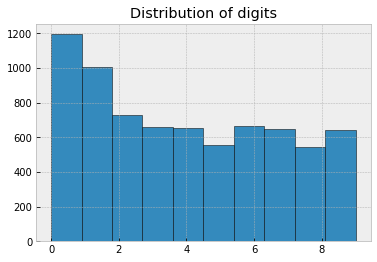

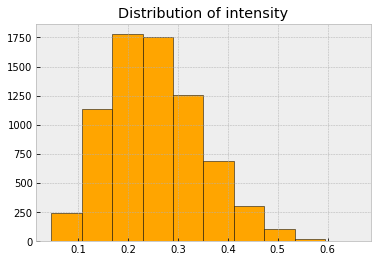

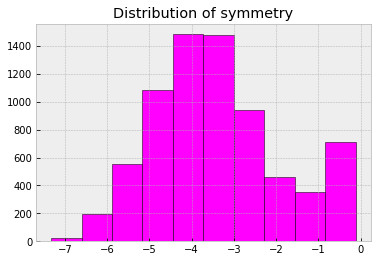

In [2]:
train = pd.read_csv('features.train', names = ['digit', 'intensity', 'symmetry'], sep='\s+', dtype=np.float64)
print(train.head(5))

print("\nshape of training data: ", train.shape)

plt.hist(train['digit'], edgecolor='black')
plt.title('Distribution of digits')
plt.show()

plt.hist(train['intensity'], color='orange', edgecolor='black')
plt.title('Distribution of intensity')
plt.show()

plt.hist(train['symmetry'], color='magenta', edgecolor='black')
plt.title('Distribution of symmetry')
plt.show()

## 7.3 Read data using `np.loadtext()`

In [3]:
# Reading in data with np.loadtxt instead of Pandas
TRAIN_DATA = np.loadtxt('features.train')
print("First five rows of our training data:")
print(TRAIN_DATA[:5,:])
print(TRAIN_DATA.dtype)

# training data ignoring 0-th column which contains the digit labels
X_TRAIN = TRAIN_DATA[:, 1:]
print("number of rows and columns in X_TRAIN:", X_TRAIN.shape)

# 0-th column contains digit labels
DIGIT_LABELS_TRAIN = TRAIN_DATA[:, 0]
print("number of rows and columns in DIGIT_LABELS_TRAIN:", DIGIT_LABELS_TRAIN.shape)

# number of training points
N_TRAIN = X_TRAIN.shape[0]

First five rows of our training data:
[[ 6.          0.3410918  -4.5289375 ]
 [ 5.          0.44413086 -5.4968125 ]
 [ 4.          0.23100195 -2.88675   ]
 [ 7.          0.20027539 -3.534375  ]
 [ 3.          0.29193555 -4.3520625 ]]
float64
number of rows and columns in X_TRAIN: (7291, 2)
number of rows and columns in DIGIT_LABELS_TRAIN: (7291,)


## 7.4 Function `get_labels()`

This function creates new labels $y$ according to the **x-vs-all** description. For example, for 0-vs-all the data for 0 is labelled +1, and the data for all the other digits is labelled -1.

In [4]:
def get_labels(x, digit_labels):
    '''
    - Takes integer 'x' (digit 0-9)
    - Takes labels
    - Returns new labels
      where the label is 1 for digit == x, and -1 otherwise.
    '''
    y = []
    for d in digit_labels:
        if d == x:
            y.append(1)
        else:
            y.append(-1)
    return np.array(y)

## 7.5 Compute the weight vector with regularization

We will use regularization with weight decay (see slide 11-13 of lecture 12).

The solution is then $\tilde{w}_{reg} = ((Z^T Z)^{-1} + \lambda I)Z^T y$. In contrast to linear regression without regularization we add the matrix $\lambda I$ with $I$ being the identity matrix.

Note that the matrix $\lambda I$ has the same size as $(Z^T Z)^{-1}$.

In [5]:
def linear_regression_reg(Z, y, lambda_param):
    '''
    - Takes feature matrix Z with rows of the form (1, z1, z2, ..., zd)
    - Takes labels y
    - Takes lambda parameter lambda_param
    - returns weight vector w_tilde_reg 
    '''    
    num_columns_Z = Z.shape[1]
    
    # see lecture 12, slide 11
    Z_dagger_reg = np.dot(np.linalg.inv(np.dot(Z.T, Z) + lambda_param * np.identity(num_columns_Z)), Z.T)

    # Use linear regression to get weight vector
    w_tilde_reg = np.dot(Z_dagger_reg, y)

    return w_tilde_reg

The parameter in problem 7 is set to $\lambda = 1$, and we only consider the digits $[5,6,7,8,9]$. We have to determine which of the **digit-vs-all** classifiers achieves the lowest $E_{in}$.

The lowest in-sample error E_in = 0.07433822520916199 is achieved for the 8-vs-all classifier


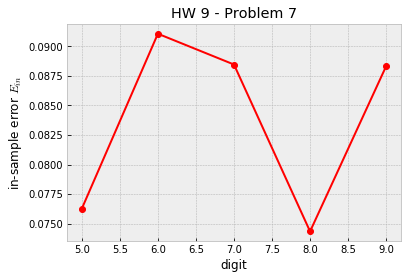

In [6]:
# Compute the in-sample error E_in

def problem7():
    
    Z_TRAIN = np.c_[np.ones(N_TRAIN), X_TRAIN]
    digit_list = [5,6,7,8,9]
    E_in_list = []
    lambda_value = 1

    min_E_in = np.inf
    min_digit = None

    for digit in digit_list:
        y = get_labels(digit, DIGIT_LABELS_TRAIN)
        w_tilde_reg = linear_regression_reg(Z_TRAIN, y, lambda_value)
        #print(w_tilde_reg.shape)
        predicted_y = np.sign(np.dot(Z_TRAIN, w_tilde_reg))
        E_in = sum(predicted_y != y) / N_TRAIN
        E_in_list.append(E_in)

        if E_in < min_E_in:
            min_E_in = E_in
            min_digit = digit


    print("The lowest in-sample error E_in = {} is achieved for the {}-vs-all classifier".format(min_E_in, min_digit))

    plt.plot(digit_list, E_in_list, 'ro-')
    plt.ylabel("in-sample error $E_{in}$")
    plt.xlabel("digit")
    plt.title("HW 9 - Problem 7")
    plt.show()
    

problem7()

## Result for problem 7

The lowest in-sample error $E_{in} = 0.074$ is achieved for the `8-vs-all` classifier. Thus **7[d]** is the correct answer.

## Problem 8

We consider the digits 0, 1, 2, 3 and 4, and we perform a feature transform $\mathbf{z} = (1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)$. This time we have to compute $E_{out}$, and determine which of the classifiers achieves the lowest $E_{out}$.

## 8.0 Read in test data

In [7]:
# Reading in data with np.loadtxt instead of Pandas
TEST_DATA = np.loadtxt('features.test')
print("First five rows of our test data:")
print(TEST_DATA[:5,:])
print(TEST_DATA.dtype)

# test data ignoring 0-th column which contains the digit labels
X_TEST = TEST_DATA[:, 1:]
print("number of rows and columns in X_TEST:", X_TEST.shape)

# 0-th column contains digit labels
DIGIT_LABELS_TEST = TEST_DATA[:, 0]
print("number of rows and columns in DIGIT_LABELS_TEST:", DIGIT_LABELS_TEST.shape)

# number of test points
N_TEST = X_TEST.shape[0]

First five rows of our test data:
[[ 9.          0.27217773 -4.8479375 ]
 [ 6.          0.26513281 -5.102     ]
 [ 3.          0.33592578 -2.9215625 ]
 [ 6.          0.26484961 -4.156625  ]
 [ 6.          0.34533789 -6.7184375 ]]
float64
number of rows and columns in X_TEST: (2007, 2)
number of rows and columns in DIGIT_LABELS_TEST: (2007,)


## 8.1 Computing $E_{out}$ for the given transform $\mathbf{z}$

- We first have to apply the transform $\mathbf{z} = (1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)$ for our feature matrix $Z$.
- This time we consider the digits in $[0,1,2,3,4]$.
- We compute the **out-of sample** error $E_{out}$.

shape of Z_TRAIN:  (7291, 6)
shape of Z_TEST:  (2007, 6)
The lowest out-of-sample error E_out = 0.02192326856003986 is achieved for the 1-vs-all classifier


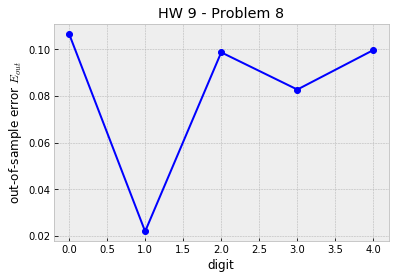

In [8]:
# Compute the out-of-sample error E_out
def problem8():

    x1 = X_TRAIN[:,0]
    x2 = X_TRAIN[:,1]
    Z_TRAIN = np.c_[np.ones(N_TRAIN), x1, x2, x1*x2, x1*x1, x2*x2]
    print("shape of Z_TRAIN: ", Z_TRAIN.shape)

    #------------

    x1 = X_TEST[:,0]
    x2 = X_TEST[:,1]
    Z_TEST = np.c_[np.ones(N_TEST), x1, x2, x1*x2, x1*x1, x2*x2]
    print("shape of Z_TEST: ", Z_TEST.shape)

    #------------

    digit_list_2 = [0,1,2,3,4]
    E_out_list = []
    lambda_value = 1

    #------------

    min_E_out = np.inf
    min_digit = None

    for digit in digit_list_2:

        # train with training data!
        y_train = get_labels(digit, DIGIT_LABELS_TRAIN)
        w_tilde_reg = linear_regression_reg(Z_TRAIN, y_train, lambda_value)
        #print(w_tilde_reg.shape)

        # compute E_out by using test data!
        predicted_y_test = np.sign(np.dot(Z_TEST, w_tilde_reg))
        y_test = get_labels(digit, DIGIT_LABELS_TEST)
        E_out = sum(predicted_y_test != y_test) / N_TEST
        E_out_list.append(E_out)

        if E_out < min_E_out:
            min_E_out = E_out
            min_digit = digit


    print("The lowest out-of-sample error E_out = {} is achieved for the {}-vs-all classifier".format(min_E_out, min_digit))

    plt.plot(digit_list_2, E_out_list, 'bo-')
    plt.ylabel("out-of-sample error $E_{out}$")
    plt.xlabel("digit")
    plt.title("HW 9 - Problem 8")
    plt.show()
    
    
    
problem8()

## Result for problem 8

The lowest out-of-sample error $E_{out} = 0.022$ is achieved for the **1-vs-all** classifier. Thus, answer **8[b]** is the correct answer.

## Problem 9

We first compare $E_{out}$ without transform versus $E_{out}$ with transform.

## 9.1 Computing $E_{out}$ without transform

shape of Z_TRAIN without transform:  (7291, 3)
shape of Z_TEST without transform:  (2007, 3)


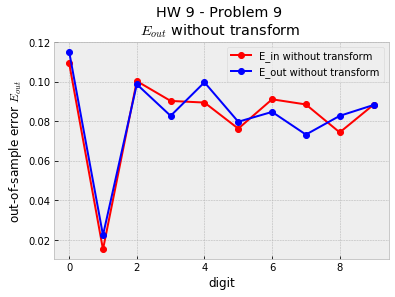

In [9]:
# Compute the in-sample error E_out
def problem9_E_out_without_transform():

    x1 = X_TRAIN[:,0]
    x2 = X_TRAIN[:,1]
    Z_TRAIN = np.c_[np.ones(N_TRAIN), x1, x2]
    print("shape of Z_TRAIN without transform: ", Z_TRAIN.shape)

    #------------

    x1 = X_TEST[:,0]
    x2 = X_TEST[:,1]
    Z_TEST = np.c_[np.ones(N_TEST), x1, x2]
    print("shape of Z_TEST without transform: ", Z_TEST.shape)

    #------------

    digit_list_all = list(range(10))
    E_out_list_all_without_transform = []
    E_in_list_all_without_transform = []
    lambda_value = 1

    #------------

    min_E_out = np.inf
    min_digit = None

    for digit in digit_list_all:

        # train with training data!
        y_train = get_labels(digit, DIGIT_LABELS_TRAIN)
        w_tilde_reg = linear_regression_reg(Z_TRAIN, y_train, lambda_value)
        #print(w_tilde_reg.shape)

        # compute E_in
        predicted_y_train = np.sign(np.dot(Z_TRAIN, w_tilde_reg)) 
        E_in = sum(predicted_y_train != y_train) / N_TRAIN
        E_in_list_all_without_transform.append(E_in)

        # compute E_out by using test data!
        predicted_y_test = np.sign(np.dot(Z_TEST, w_tilde_reg))
        y_test = get_labels(digit, DIGIT_LABELS_TEST)
        E_out = sum(predicted_y_test != y_test) / N_TEST
        E_out_list_all_without_transform.append(E_out)

        if E_out < min_E_out:
            min_E_out = E_out
            min_digit = digit


    #print("The lowest out-of-sample error E_out = {} is achieved for the {}-vs-all classifier".format(min_E_out, min_digit))

    plt.plot(digit_list_all, E_in_list_all_without_transform, 'ro-', label='E_in without transform')
    plt.plot(digit_list_all, E_out_list_all_without_transform, 'bo-', label='E_out without transform')
    plt.ylabel("out-of-sample error $E_{out}$")
    plt.xlabel("digit")
    plt.title("HW 9 - Problem 9 \n$E_{out}$ without transform ")
    plt.legend()
    plt.show()

    return E_in_list_all_without_transform, E_out_list_all_without_transform
    
    
E_in_list_all_without_transform, E_out_list_all_without_transform = problem9_E_out_without_transform()

## 9.2 computing $E_{out}$ with transform

shape of Z_TRAIN with transform:  (7291, 6)
shape of Z_TEST with transform:  (2007, 6)


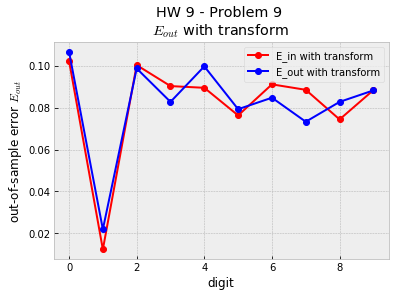

In [10]:
# Compute the in-sample error E_out
def problem9_E_out_with_transform():

    x1 = X_TRAIN[:,0]
    x2 = X_TRAIN[:,1]
    Z_TRAIN = np.c_[np.ones(N_TRAIN), x1, x2, x1*x2, x1*x1, x2*x2]
    print("shape of Z_TRAIN with transform: ", Z_TRAIN.shape)

    #------------

    x1 = X_TEST[:,0]
    x2 = X_TEST[:,1]
    Z_TEST = np.c_[np.ones(N_TEST), x1, x2, x1*x2, x1*x1, x2*x2]
    print("shape of Z_TEST with transform: ", Z_TEST.shape)

    #------------

    digit_list_all = list(range(10))
    E_out_list_all_with_transform = []
    E_in_list_all_with_transform = []
    lambda_value = 1


    #------------

    min_E_out = np.inf
    min_digit = None

    for digit in digit_list_all:

        # train with training data!
        y_train = get_labels(digit, DIGIT_LABELS_TRAIN)
        w_tilde_reg = linear_regression_reg(Z_TRAIN, y_train, lambda_value)
        #print(w_tilde_reg.shape)

        # compute E_in
        predicted_y_train = np.sign(np.dot(Z_TRAIN, w_tilde_reg)) 
        E_in = sum(predicted_y_train != y_train) / N_TRAIN
        E_in_list_all_with_transform.append(E_in)

        # compute E_out by using test data!
        predicted_y_test = np.sign(np.dot(Z_TEST, w_tilde_reg))
        y_test = get_labels(digit, DIGIT_LABELS_TEST)
        E_out = sum(predicted_y_test != y_test) / N_TEST
        E_out_list_all_with_transform.append(E_out)

        if E_out < min_E_out:
            min_E_out = E_out
            min_digit = digit


    #print("The lowest out-of-sample error E_out = {} is achieved for the {}-vs-all classifier".format(min_E_out, min_digit))

    plt.plot(digit_list_all, E_in_list_all_with_transform, 'ro-', label='E_in with transform')
    plt.plot(digit_list_all, E_out_list_all_with_transform, 'bo-', label='E_out with transform')
    plt.ylabel("out-of-sample error $E_{out}$")
    plt.xlabel("digit")
    plt.title("HW 9 - Problem 9 \n$E_{out}$ with transform ")
    plt.legend()
    plt.show()
    
    return E_in_list_all_with_transform, E_out_list_all_with_transform
    
    
    
E_in_list_all_with_transform, E_out_list_all_with_transform = problem9_E_out_with_transform()

## 9.4 Comparing $E_{out}$ with and without transform

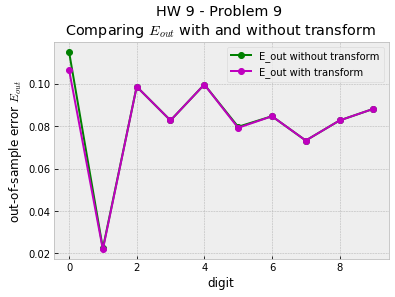

Let's plot the difference between the E_out values without and with transform:


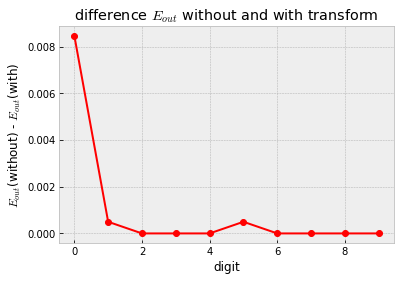

difference: E_out without - E_out with transform:
digit = 0 => difference = 0.008470353761833582
digit = 1 => difference = 0.0004982561036372679
digit = 2 => difference = 0.0
digit = 3 => difference = 0.0
digit = 4 => difference = 0.0
digit = 5 => difference = 0.0004982561036372679
digit = 6 => difference = 0.0
digit = 7 => difference = 0.0
digit = 8 => difference = 0.0
digit = 9 => difference = 0.0


In [11]:
def problem9_comparison_E_out_with_and_without_transform():

    digit_list_all = list(range(10))
    plt.plot(digit_list_all, E_out_list_all_without_transform, 'go-', label='E_out without transform')
    plt.plot(digit_list_all, E_out_list_all_with_transform, 'mo-', label='E_out with transform')
    plt.ylabel("out-of-sample error $E_{out}$")
    plt.xlabel("digit")
    plt.title("HW 9 - Problem 9 \nComparing $E_{out}$ with and without transform ")
    plt.legend()
    plt.show()

    print("Let's plot the difference between the E_out values without and with transform:")
    difference_E_out_with_without_transform = np.array(E_out_list_all_without_transform) - np.array(E_out_list_all_with_transform)
    plt.plot(digit_list_all, difference_E_out_with_without_transform, '-ro')
    plt.xlabel("digit")
    plt.ylabel("$E_{out}$(without) - $E_{out}$(with)")
    plt.title("difference $E_{out}$ without and with transform")
    plt.show()


    print("difference: E_out without - E_out with transform:")
    for digit, E_out in zip(digit_list_all, difference_E_out_with_without_transform):
        print("digit = {} => difference = {}".format(digit, E_out))
        
        
        
        
problem9_comparison_E_out_with_and_without_transform()

### Exploring option 9[b], 9[c] and 9[d]

**Conclusion**: The out-of-sample error $E_{out}$ is smaller with a transform for digits 0, 1, 5. For the other digits the performance with and without transform is equal. We can exclude options 9[b], 9[c] and 9[d].


### Exploring option 9[e]

For digit 5 there is an improvement of the out-of-sample error when using the transform. Let's check if the transform improves the out-of-sample performance by at least $5\%$ for **5-vs-all** by checking if the following holds:

$E_{out}^{with} \leq 0.95 E_{out}^{without}$

In [12]:
print("ratio E_out_with / E_out_without = ", E_out_list_all_with_transform[5] / E_out_list_all_without_transform[5])
print("\nE_out_with <= 0.95 E_out_without ?", E_out_list_all_with_transform[5] <= 0.95 * E_out_list_all_without_transform[5])

ratio E_out_with / E_out_without =  0.99375

E_out_with <= 0.95 E_out_without ? False


**Conclusion:** We have shown that the transform improves the out-of sample performance for **5-vs-all**, but by less than 5%. Therefore, option **9[e]** is the correct answer.

Despite having shown that 9[e] is the correct answer,  let us confirm that 9[a] *"Overfitting always occurs when we use the transform."* is not the correct answer

### Exploring option 9[a]

Let's examine if overfitting occurs. First, let's plot how $E_{in}$ behaves with and without transform. Let's think about what we expect. 


- $E_{in}$ should go down if we use a more complex model, i.e. if we use the feature transform $\mathbf{z} = (1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)$ which is more complex than the feature transform $\mathbf{z} = (1, x_1, x_2)$, then $E_{in}$ should go down.

- The question is what happens with $E_{out}$ when we go from the less complex to the more complex model. For overfitting to occur $E_{out}$ should then go up.

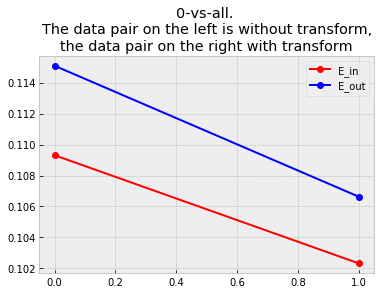

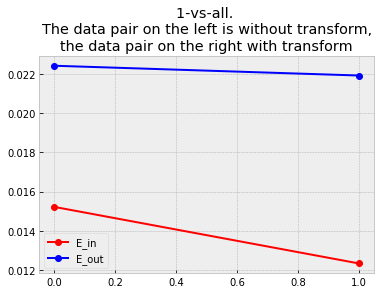

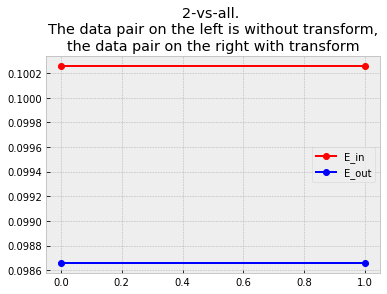

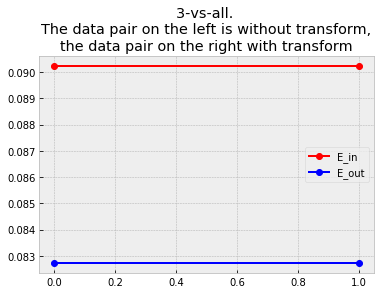

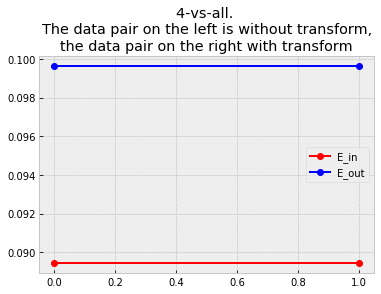

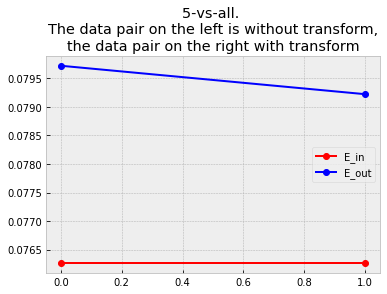

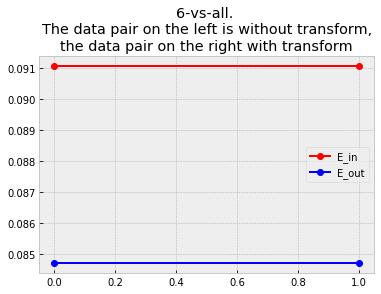

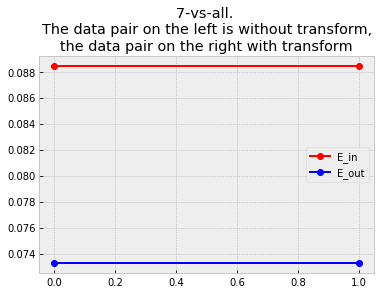

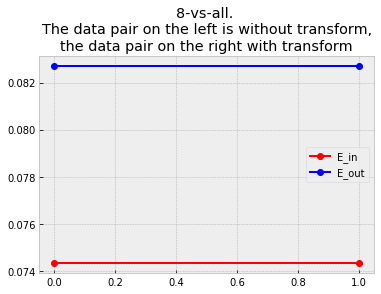

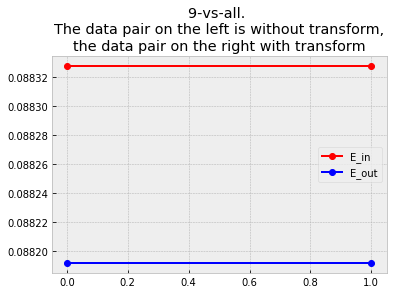

In [13]:
for digit in range(10):
    E_in_values = [ E_in_list_all_without_transform[digit], E_in_list_all_with_transform[digit]]
    E_out_values = [ E_out_list_all_without_transform[digit], E_out_list_all_with_transform[digit]]
    plt.plot(E_in_values, 'ro-', label='E_in')
    plt.plot(E_out_values, 'bo-', label='E_out')
    plt.title("{}-vs-all. \nThe data pair on the left is without transform,\nthe data pair on the right with transform".format(digit))
    plt.legend()
    plt.show()

**Conclusion:** We cannot observe overfitting, i.e. we cannot observe that when $E_{in}$ goes down, then $E_{out}$ goes up.

## Result for Problem 9

We have have shown that the transform improves the out-of sample performance for **5-vs-all**, but by less than 5%. Therefore, option **9[e]** is the correct answer.

_____________

# Problem 10

We train the **1-vs-5** classifier with $\mathbf{z} = (1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)$ for $\lambda = 0.01$ and $\lambda = 1$.

## 10.1 Read training data using pandas

In [14]:
df_train = pd.read_csv('features.train', names = ['digit', 'intensity', 'symmetry'], sep='\s+', dtype=np.float64)
print(df_train.head(5), end='\n\n')
print("shape of df_train: ", df_train.shape)

   digit  intensity  symmetry
0    6.0   0.341092 -4.528937
1    5.0   0.444131 -5.496812
2    4.0   0.231002 -2.886750
3    7.0   0.200275 -3.534375
4    3.0   0.291936 -4.352062

shape of df_train:  (7291, 3)


## 10.2 Preparing the training data for the 1-vs-5 classifier

We consider the **1-vs-5 classifier**.

In [15]:
# Consider 1 vs 5 classifier
# We choose only rows with digits == 1 or digits == 5
df_train[df_train['digit'] == 1]
df_train[df_train['digit'] == 5]

# Append a column y with labels y=+1 for digit==1
ones = df_train[df_train['digit'] == 1].assign(y = np.ones(df_train[df_train['digit'] == 1].shape[0]))
print("Number of rows and columns for 'ones' dataframe: ", ones.shape)

# Append a column y with labels y=-1 for digit==5
# https://chrisalbon.com/python/pandas_assign_new_column_dataframe.html
fives = df_train[df_train['digit'] == 5].assign(y = -np.ones(df_train[df_train['digit'] == 5].shape[0]))
print("Number of rows and columns for 'fives' dataframe: ", fives.shape)

# Glue together the dataframes for ones and fives
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
df_1_vs_5 = ones.append(fives, ignore_index=True)
print("Number of rows and columns of 1-vs-5 dataframe: ", df_1_vs_5.shape, end='\n\n')

print("- First five rows of 1-vs-5 dataframe:\n")
print(df_1_vs_5.head(5), end='\n\n')

print("- Last five rows of 1-vs-5 dataframe:\n")
print(df_1_vs_5.tail(5), end='\n\n')

Number of rows and columns for 'ones' dataframe:  (1005, 4)
Number of rows and columns for 'fives' dataframe:  (556, 4)
Number of rows and columns of 1-vs-5 dataframe:  (1561, 4)

- First five rows of 1-vs-5 dataframe:

   digit  intensity  symmetry    y
0    1.0   0.123043 -0.707875  1.0
1    1.0   0.113859 -0.931375  1.0
2    1.0   0.115371 -0.386000  1.0
3    1.0   0.102281 -0.378812  1.0
4    1.0   0.142043 -1.819438  1.0

- Last five rows of 1-vs-5 dataframe:

      digit  intensity  symmetry    y
1556    5.0   0.272961 -5.079125 -1.0
1557    5.0   0.199475 -4.211938 -1.0
1558    5.0   0.367961 -5.660000 -1.0
1559    5.0   0.355293 -4.682750 -1.0
1560    5.0   0.232881 -4.423813 -1.0



## 10.3 Extracting the training data and the labels

In [16]:
# Training data
X_train_1_vs_5 = np.c_[df_1_vs_5['intensity'], df_1_vs_5['symmetry']]
print("shape of X_train_1_vs_5: ", X_train_1_vs_5.shape)

# labels
y_train_1_vs_5 = np.array(df_1_vs_5['y'])
print("shape of y_train_1_vs_5: ", y_train_1_vs_5.shape)

N_train_1_vs_5 = X_train_1_vs_5.shape[0]

shape of X_train_1_vs_5:  (1561, 2)
shape of y_train_1_vs_5:  (1561,)


## 10.4 Reading the TEST data using pandas

In [17]:
# Let's first read in the test set
df_test = pd.read_csv('features.test', names = ['digit', 'intensity', 'symmetry'], sep='\s+', dtype=np.float64)

print("- Printing the first five rows of the test set:\n")
print(df_test.head(5))

print("\n\n- Number of rows and columns in the test set table:", df_test.shape)

print("\n\n- Number of rows with digit 1:", df_test[df_test['digit'] == 1].shape[0])
print("- Number of rows with digit 5:", df_test[df_test['digit'] == 5].shape[0])

- Printing the first five rows of the test set:

   digit  intensity  symmetry
0    9.0   0.272178 -4.847937
1    6.0   0.265133 -5.102000
2    3.0   0.335926 -2.921562
3    6.0   0.264850 -4.156625
4    6.0   0.345338 -6.718438


- Number of rows and columns in the test set table: (2007, 3)


- Number of rows with digit 1: 264
- Number of rows with digit 5: 160


## 10.5 Preparing the test data for the 1-vs-5 classifier

We consider the **1-vs-5 classifier**.

In [18]:
# Consider test set for 1-vs-5 classifier

# Append a column y with labels y=+1 for digit==1
ones_test = df_test[df_test['digit'] == 1].assign(y = np.ones(df_test[df_test['digit'] == 1].shape[0]))
print("Number of rows and columns for 'ones_test' dataframe: ", ones_test.shape)

# Append a column y with labels y=-1 for digit==5
# https://chrisalbon.com/python/pandas_assign_new_column_dataframe.html
fives_test = df_test[df_test['digit'] == 5].assign(y = -np.ones(df_test[df_test['digit'] == 5].shape[0]))
print("Number of rows and columns for 'fives_test' dataframe: ", fives_test.shape)

# Glue together the dataframes ones_test and fives_test
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
df_test_1_vs_5 = ones_test.append(fives_test, ignore_index=True)

print("Number of rows and columns in the dataframe", df_test_1_vs_5.shape)

print("\n\n- First five rows of 1_vs_5_test dataframe:\n")
print(df_test_1_vs_5.head(5), end='\n\n')

print("- Last five rows of 1_vs_5_test dataframe:\n")
print(df_test_1_vs_5.tail(5), end='\n\n')

Number of rows and columns for 'ones_test' dataframe:  (264, 4)
Number of rows and columns for 'fives_test' dataframe:  (160, 4)
Number of rows and columns in the dataframe (424, 4)


- First five rows of 1_vs_5_test dataframe:

   digit  intensity  symmetry    y
0    1.0   0.159934 -1.742000  1.0
1    1.0   0.124609 -0.474438  1.0
2    1.0   0.219117 -0.904500  1.0
3    1.0   0.244779 -2.505625  1.0
4    1.0   0.105563 -0.218562  1.0

- Last five rows of 1_vs_5_test dataframe:

     digit  intensity  symmetry    y
419    5.0   0.324154 -5.089062 -1.0
420    5.0   0.360320 -5.737500 -1.0
421    5.0   0.445924 -5.343562 -1.0
422    5.0   0.384980 -5.086000 -1.0
423    5.0   0.339586 -4.722875 -1.0



## 10.6 Extracting the TEST data and the labels

In [19]:
# Create X_test
X_test_1_vs_5 = np.c_[df_test_1_vs_5['intensity'], df_test_1_vs_5['symmetry']]
print("Number of rows and columns in X_test_1_vs_5: ", X_test_1_vs_5.shape)

y_test_1_vs_5 = np.array(df_test_1_vs_5['y'])
print("Number of rows and columns in y_test_1_vs_5: ", y_test_1_vs_5.shape)

N_test_1_vs_5 = X_test_1_vs_5.shape[0]

Number of rows and columns in X_test_1_vs_5:  (424, 2)
Number of rows and columns in y_test_1_vs_5:  (424,)


## 10.7 Linear regression with regularization

We train with linear regression with regularization for $\lambda = 1$ and $\lambda = 0.01$.

In [20]:
# store the values for E_in for lambda = 1 and lambda = 0.01
def problem10():
    
    E_in_values = []
    E_out_values = []

    # feature matrix
    x1 = X_train_1_vs_5[:,0]
    x2 = X_train_1_vs_5[:,1]
    Z_TRAIN_1_vs_5 = np.c_[np.ones(N_train_1_vs_5), x1, x2, x1*x2, x1*x1, x2*x2]
    print("shape of Z_TRAIN_1_vs_5: ", Z_TRAIN_1_vs_5.shape)

    # feature matrix
    x1 = X_test_1_vs_5[:,0]
    x2 = X_test_1_vs_5[:,1]
    Z_TEST_1_vs_5 = np.c_[np.ones(N_test_1_vs_5), x1, x2, x1*x2, x1*x1, x2*x2]
    print("shape of Z_TEST_1_vs_5: ", Z_TEST_1_vs_5.shape)



    for lambda_value in [1, 0.01]:
        w_tilde_reg = linear_regression_reg(Z_TRAIN_1_vs_5, y_train_1_vs_5, lambda_value)
        print(w_tilde_reg, w_tilde_reg.shape)


        # Compute E_in
        y_predict_train_1_vs_5 = np.sign(np.dot(Z_TRAIN_1_vs_5, w_tilde_reg))
        E_in = np.sum(y_train_1_vs_5 != y_predict_train_1_vs_5) / N_train_1_vs_5
        E_in_values.append(E_in)

        # Compute E_out
        y_predict_test_1_vs_5 = np.sign(np.dot(Z_TEST_1_vs_5, w_tilde_reg))
        E_out = np.sum(y_test_1_vs_5 != y_predict_test_1_vs_5) / N_test_1_vs_5
        E_out_values.append(E_out)
        
    return E_in_values, E_out_values
    
    
E_in_values, E_out_values = problem10()

shape of Z_TRAIN_1_vs_5:  (1561, 6)
shape of Z_TEST_1_vs_5:  (424, 6)
[ 1.39444919  0.47743748  0.77188926 -0.12728014 -0.05660804  0.04520773] (6,)
[ 1.27114559  2.25478075  0.82549599 -0.51572027 -5.84769754  0.03777864] (6,)


## Explore options 10[b] and 10[c]

In [21]:
print("E_in values: ", E_in_values)
print("E_out values: ", E_out_values)

print("\nE_in_lambda_1 == E_in_lambda_0_01 ?", E_in_values[0] == E_in_values[1])
print("E_out_lambda_1 == E_out_lambda_0_01 ?", E_out_values[0] == E_out_values[1])

E_in values:  [0.0051249199231262008, 0.0044843049327354259]
E_out values:  [0.025943396226415096, 0.028301886792452831]

E_in_lambda_1 == E_in_lambda_0_01 ? False
E_out_lambda_1 == E_out_lambda_0_01 ? False


**Conclusion** We can exclude options 10[b] and 10[c].

## Explore option 10[a]

Check if overfitting occurs from $\lambda = 1$ to $\lambda = 0.01$.

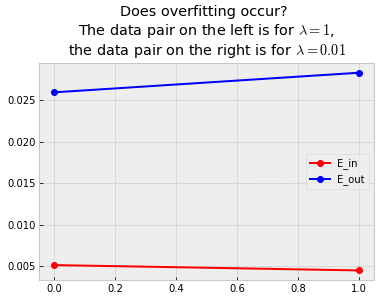

In [22]:
plt.plot(E_in_values, 'ro-', label='E_in')
plt.plot(E_out_values, 'bo-', label='E_out')
plt.title("Does overfitting occur? \nThe data pair on the left is for $\lambda=1$,\nthe data pair on the right is for $\lambda=0.01$".format(digit))
plt.legend()
plt.show()

**Conclusion**: We can see that $E_{out}$ goes up, while $E_{in}$ goes down. This means that overfitting occurs from $\lambda = 1$ to $\lambda = 0.01$

This means the correct answer is **10[a]**.

The plot above also let's us exclude options 10[d] and 10[e].

## Result for Problem 10

The correct answer is **10[a]**.